# DES ECS Data Access Onboarding Tutorial

Written by Spencer Everett

ECS Onboarding Workshop - Penn Collaboration Meeting, June 2019

This is meant to be a quick overview of installing & using `easyaccess` to make some exploratory plots with Y3 & Y5 data.

More details are at the [Getting Started with DES](https://cdcvs.fnal.gov/redmine/projects/desecs/wiki/Getting_Started) and [ECS onboarding workshop](https://cdcvs.fnal.gov/redmine/projects/desecs/wiki/Penn_ECS_Onboarding_Workshop) Redmine pages.

## Package Requirements

You will need a python package to open fits files. [astropy.io.fits](http://docs.astropy.org/en/stable/io/fits/) is the standard for many, but I will use Erin Sheldon's [fitsio](https://github.com/esheldon/fitsio) as a default as it can give significant performance benefits for large files (read more about `fitsio` vs `pyfits` [here](http://docs.astropy.org/en/stable/io/fits/appendix/faq.html#why-is-fitsio-so-much-faster-than-astropy-at-reading-tables))

If you don't already have `fitsio` installed, you can either (1) install it with **one** of the following:

    pip install fitsio

    conda install -c conda-forge fitsio

or (2) commment out the `fitsio` blocks in the following and uncomment the astropy blocks.

In [1]:
import fitsio

We will install `easyaccess` later in the tutorial.

[matplotlib](https://matplotlib.org/) and [numpy](https://www.numpy.org/) are used.

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

%matplotlib inline

import numpy as np

## Data Access Links

There are many ways & existing interfaces to access DES data and we will only cover a few examples here. For more details, check out the following links:

[DESDM Public Releases](https://des.ncsa.illinois.edu/releases)

[DESDM Data Access FAQ](https://opensource.ncsa.illinois.edu/confluence/display/DESDM/Data+Access+FAQ) (desoper)

[DES Labs](https://deslabs.ncsa.illinois.edu/) (account info)

[Easyweb](https://deslabs.ncsa.illinois.edu/easyweb/) (account info | dessci, desoper)

[Cutout Server](https://deslabs.ncsa.illinois.edu/easyweb/bulk-cutouts) (desoper)


# Easyaccess

## Setup

The new DESDM database client is called [`easyaccess`](https://opensource.ncsa.illinois.edu/confluence/display/DESDM/EasyAccess), a Python Command Line Interpreter to access the Oracle DES database. After the hard work of many people it is now `pip` / `conda` installable! Run **one** of the following from your terminal:

(If looking at this tutorial after the 2019 Penn meeting, please replace 1.4.3 with the newest version [here](https://opensource.ncsa.illinois.edu/confluence/display/DESDM/EasyAccess))

`pip install easyaccess==1.4.3`

`conda install -c mgckind easyaccess=1.4.3`

You can also get `easyaccess` on a separate [docker image](https://opensource.ncsa.illinois.edu/bitbucket/projects/DESDM/repos/easyaccess_docker/browse) if you prefer.

You will need to modify a configuration file with your DES account(s) info. Open the file `.desservices.ini` which should be in your `$HOME` directory. There should be sections that look like this:
```
[db-dessci]
user = {your_username}
passwd = ****
name = dessci
server = desdb.ncsa.illinois.edu
port = 1521
```
Fill in your relevant account username and passwords.

There is an additional `easyaccess` config file where you can optionally change some settings at  `$HOME/.easyaccess/config.ini`

You can check out a [tutorial slideshow](http://matias-ck.com/easyaccess/#/Home) by Matias Carrasco Kind, but we'll go over the essentials in this notebook.

## Easyaccess in the terminal

Open a terminal and change your working directory to where this notebook is located on your local machine. Simply run the following:

`$ easyaccess`

You should see roughly the following:

![title](easyaccess.png)

There are a variety of commands you can use (type "`help <command>`" for more details):
```
                                *DB Commands*
================================================================================
add_comment     find_tables              myquota                 show_index 
append_table    find_tables_with_column  mytables                user_tables
change_db       find_user                refresh_metadata_cache  whoami     
describe_table  load_table               set_password          
execproc        loadsql                  show_db
================================================================================
```

### Grabbing Data

Let's find some Y3 data! The GOLD catalog is intended to be the basis for DES cosmology analyses and is described on redmine [here](https://cdcvs.fnal.gov/redmine/projects/des-y3/wiki/Y3_Gold_release). We can look for all tables containing `Y3_GOLD` with the following command:

`DESDM ~> find_tables %Y3A2_GOLD%`

You should see something like the following:
```
================================================================================
        OWNER                                                  TABLE_NAME
1    MCARRAS2                                        Y3_GOLD_1_0_DESCRIBE
2    MCARRAS2                                            Y3_GOLD_2_0_MINI
...
9   DES_ADMIN                                                 Y3_GOLD_2_2
10  DES_ADMIN                                                 Y3_GOLD_2_0
11  DES_ADMIN                                         Y3_GOLD_1_0_RC1_NEW
================================================================================
```
Official catalogs produced by DESDM will have owner `DES_ADMIN`. On the wiki link above we see that 2.2 is the latest version, so let's take a look at what's contained in `Y3_GOLD_2_2` (you have to specify `OWNER.TABLE_NAME` except when `OWNER=DES_ADMIN`):

`DESDM ~> describe_table Y3_GOLD_2_2`

```
================================================================================
Estimated number of rows: 399263026

                 COLUMN_NAME      DATA_TYPE    DATA_FORMAT  COMMENTS                                                                                                                                                                
1             ALPHAWIN_J2000  BINARY_DOUBLE              8  Right Ascension (J2000.0) of the object ...                      
2               A_FIDUCIAL_G   BINARY_FLOAT              4  Fiducial extinction correction using ...              
3               A_FIDUCIAL_I   BINARY_FLOAT              4  Fiducial extinction correction using ...                 
4               A_FIDUCIAL_R   BINARY_FLOAT              4  Fiducial extinction correction using ...               
5               A_FIDUCIAL_Y   BINARY_FLOAT              4  Fiducial extinction correction using ...
...
446               YWIN_IMAGE  BINARY_DOUBLE              8  Y Position of the barycenter of the ...              

```

This table contains 446 rows for almost 400 million objects! That's too many to download on a local machine, so let's first just look at a few select columns for the first 10 objects:

`DESDM ~> SELECT RA, DEC, MAG_AUTO_G, TILENAME from Y3_GOLD_2_2 where rownum<11;`

```
================================================================================
10 rows in 1.05 seconds

           RA        DEC  MAG_AUTO_G      TILENAME
1   11.444518 -65.464639   99.000000  DES0048-6539
2   11.503186 -65.504479   99.000000  DES0048-6539
3   11.365533 -65.686787   99.000000  DES0048-6539
4    3.973490 -64.632888   26.573425  DES0017-6456
5    4.870360 -64.715432   24.221245  DES0017-6456
6    4.041939 -64.836803   24.084530  DES0017-6456
7    3.624265 -64.890576   23.642332  DES0017-6456
8    5.095969 -64.959202   22.850704  DES0017-6456
9    4.832452 -64.989467   23.699278  DES0017-6456
10   4.814036 -65.042003   23.286951  DES0017-6456
================================================================================
```
However to do science you'll want to save the catalog data to a file. Let's grab all columns for a random subset of objects and save it to a fits file:

`# This query selects 0.001% of the data
DESDM ~> SELECT * from Y3_GOLD_2_2 sample(0.001); > y3_gold_sample.fits
`

Alternatively, you can load the data straight into a pandas DataFrame by using the following commands (described more in other demos):

In [3]:
# Not used in this demo, but can save data straight to the notebook this way:
# import easyaccess as ea

# query='select * from Y3_GOLD_2_2 sample(0.001)'

# connection=ea.connect()
# pandas_data = connection.query_to_pandas(query)

## Exploratory plots

Let's make some simple plots! First let's plot the objects' positions:

Text(0,0.5,u'DEC')

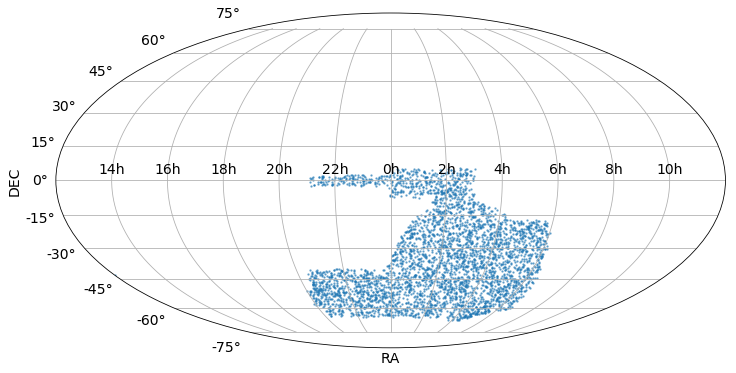

In [4]:
# This assumes you saved the Gold sample from easyaccess to the notebook directory
# You 
data_file = 'y3_gold_sample.fits'

PI = np.pi
d2r = PI / 180.

fs = 14
plt.rcParams.update({'font.size': fs})

# We'll only grab needed cols for less memory usage
cols = ['ra', 'dec', 'mof_cm_mag_i', 'sof_cm_mag_i', 'flags_gold']
data = fitsio.read(data_file, columns=cols)
ra  = d2r * data['RA']
dec = d2r * data['DEC']

ra[0] = PI

ra[ra>=PI] = ra[ra>=PI] - 2*PI

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra, dec, alpha=0.5, s=2)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)
plt.xlabel('RA')
plt.ylabel('DEC')

That looks correct! Now let's look at completeness in MOF & SOF i-band:
(Go through the ngmix photometry comparison demo & look at the [DES Y1 photometry paper](https://arxiv.org/abs/1708.01531) for more difference between the two methods. Short version is masking neighboring objects vs subtracting neighboring objects)

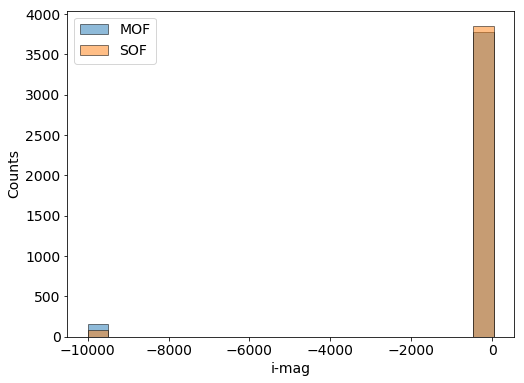

In [5]:
imag_mof = data['MOF_CM_MAG_I']
imag_sof = data['SOF_CM_MAG_I']

bins = 20

fig = plt.figure(figsize=(8,6))
plt.hist(imag_mof, alpha=0.5, ec='k', label='MOF', bins=bins)
plt.hist(imag_sof, alpha=0.5, ec='k', label='SOF', bins=bins)
plt.xlabel('i-mag')
plt.ylabel('Counts')
plt.legend()

This looks wrong because we haven't removed any suspicious or flagged objects from our sample. If we had read the linked Y3 Gold documentation carefully, we would have found a description of the column [FLAGS_GOLD](https://cdcvs.fnal.gov/redmine/projects/des-y3/wiki/Y3A2_Flag_gold). 

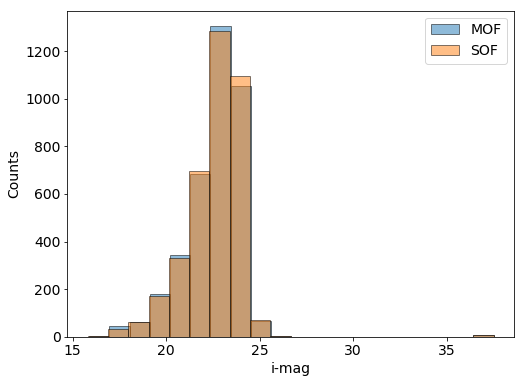

In [6]:
gflags = data['FLAGS_GOLD']
cuts = np.where(gflags == 0)

fig = plt.figure(figsize=(8,6))
plt.hist(imag_mof[cuts], alpha=0.5, ec='k', label='MOF', bins=bins)
plt.hist(imag_sof[cuts], alpha=0.5, ec='k', label='SOF', bins=bins)
plt.xlabel('i-mag')
plt.ylabel('Counts')
plt.legend()

The very faint objects are not physical despite getting through simple cuts - play around with some parameters like `cm_T`, `cm_T_err`, and `cm_s2n_r` to see if you can find any trends, or look through the documentation to find more conservative cuts.

In [7]:
# Extra if you'd like:
# grab objects w/ i-mag > 30
# plot histograms of s2n, cm_T / cm_T_err, etc. for each population

For the moment we'll just consider the main population:

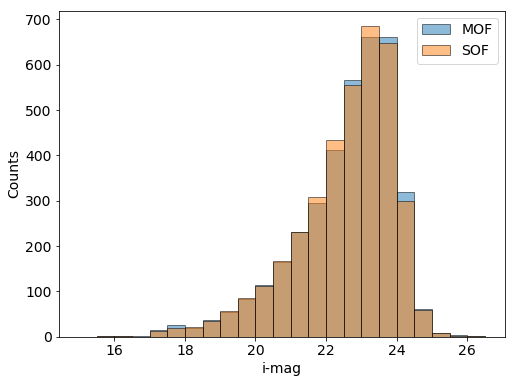

In [8]:
# We will make an additional faint cut for clarity
bins = np.arange(15, 27, 0.5)
fig = plt.figure(figsize=(8,6))
plt.hist(imag_mof[cuts], alpha=0.5, ec='k', label='MOF', bins=bins)
plt.hist(imag_sof[cuts], alpha=0.5, ec='k', label='SOF', bins=bins)
plt.xlabel('i-mag')
plt.ylabel('Counts')
plt.legend()

As you can see from the plot, the i-mag is complete until close to 23.5.

We can also look at the differences between measured MOF and SOF magnitudes for each object:

-0.001201604100149467
0.06116312035431317


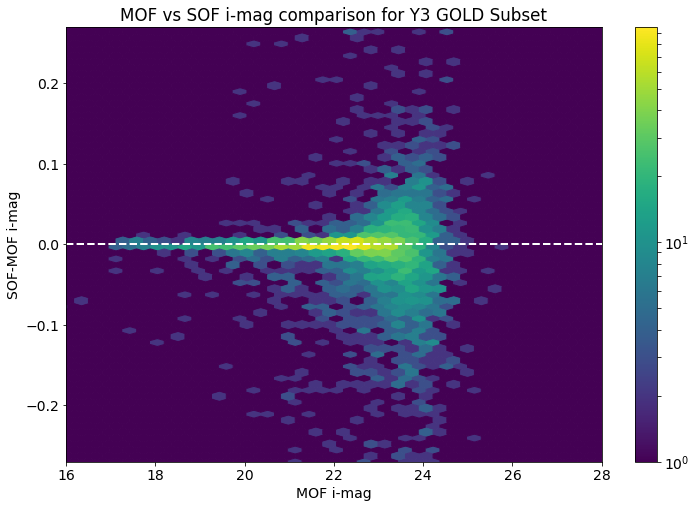

In [9]:
x = imag_mof[cuts]
y = imag_sof[cuts]
diff = y - x

dcut = 0.3
mcuts = np.where( (-dcut < diff) & (diff < dcut) )

gs = 70

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)
hb = ax.hexbin(x[mcuts], diff[mcuts], norm=LogNorm(), gridsize=gs)
cb = plt.colorbar(hb, ax=ax)
plt.axhline(0, ls='--', lw=2, c='w')
plt.xlim(16, 28)
plt.ylim(-0.9*dcut, 0.9*dcut)
plt.xlabel('MOF i-mag')
plt.ylabel('SOF-MOF i-mag')
plt.title('MOF vs SOF i-mag comparison for Y3 GOLD Subset')
fig.set_size_inches(12,8)

# Print out msome difference information
print(np.median(diff[mcuts]))
print(np.std(diff[mcuts])) # Only very sensible if done in mag bins, try this

The magnitudes are quite similar and have a very small offset bias, but they are not the same!

## A few suggestions for further things to try:

- Grab all griz-band magnitudes instead of just i-band, and plot distribution of colors (e.g. plot (g-r) vs (r-i), etc.)
- Look how MOF vs SOF performance depends on `cm_s2n_r` or `cm_T / cm_T_err`
- Can you identify which objects are stars vs galaxies? There are some cuts described on [this wiki page](https://cdcvs.fnal.gov/redmine/projects/des-y3/wiki/Y3_Extended_Classifier_v2) that you can make. See if you can reproduce those plots!
- Look through the columns on easyaccess and find 2 that might be interesting to plot against one another. What about when you separate using the above quality cuts?
- Try making similar plots with Y5 data using the `PROD.Y5A1_COADD_OBJECT_SUMMARY` table

There is also this example query from DESDM if you'd like to play around with a star catalog around the center of globular cluster M2:

```
================================================================================
-- This query selects the first 1000 rows from a RA/DEC region
SELECT ALPHAWIN_J2000 RAP,DELTAWIN_J2000 DECP, MAG_AUTO_G, TILENAME
FROM Y3_GOLD_2_2
WHERE
RA BETWEEN 40.0 and 41.0 and
DEC BETWEEN -41 and -40 and
ROWNUM < 1001
================================================================================
```

```
================================================================================
-- This query selects stars around the center of glubular cluster M2
SELECT
  COADD_OBJECT_ID,RA,DEC,
  MAG_AUTO_G G,
  MAG_AUTO_R R,
  WAVG_MAG_PSF_G G_PSF,
  WAVG_MAG_PSF_R R_PSF
FROM Y3_GOLD_2_2
WHERE
   RA between 323.36-0.12 and 323.36+0.12 and
   DEC between -0.82-0.12 and -0.82+0.12 and
   WAVG_SPREAD_MODEL_I + 3.0*WAVG_SPREADERR_MODEL_I < 0.005 and
   WAVG_SPREAD_MODEL_I > -1 and
   IMAFLAGS_ISO_G = 0 and
   IMAFLAGS_ISO_R = 0 and
   SEXTRACTOR_FLAGS_G < 4 and
   SEXTRACTOR_FLAGS_R < 4
================================================================================
```

Have fun!